## 3. Clasificación de caracteres manuscritos (OCR) (OPCIONAL)

En este apartado entrenaremos una red neuronal para que aprenda a clasificar automáticamente imágenes de dígitos escritos a mano. Este es un ejemplo de OCR (Optical Character Recognition) que utilizan empresas como Correos para interpretar automáticamente los datos de remitente escritos a mano en el sobre, previamente capturados con una cámara.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np

%matplotlib inline

## 3.1. Carga de datos

Usaremos la base de datos **MNIST**, muy usada en Machine Learning para poner a prueba algoritmos. A continuación la cargamos:

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255. # reescalado de datos para que los datos de píxeles vayan de 0 a 1
y = y.astype(int) # las etiquetas leídas son de tipo str: las convertimos a int

In [3]:
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

print(y[:10])

<class 'pandas.core.frame.DataFrame'>
(70000, 784)
<class 'pandas.core.series.Series'>
(70000,)
0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: int32


In [4]:
n_clases = len(np.unique(y))
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X.min(), X.max()

(52500, 784)
(52500,)
(17500, 784)
(17500,)


(pixel1      0.0
 pixel2      0.0
 pixel3      0.0
 pixel4      0.0
 pixel5      0.0
            ... 
 pixel780    0.0
 pixel781    0.0
 pixel782    0.0
 pixel783    0.0
 pixel784    0.0
 Length: 784, dtype: float64,
 pixel1      0.000000
 pixel2      0.000000
 pixel3      0.000000
 pixel4      0.000000
 pixel5      0.000000
               ...   
 pixel780    0.243137
 pixel781    0.000000
 pixel782    0.000000
 pixel783    0.000000
 pixel784    0.000000
 Length: 784, dtype: float64)

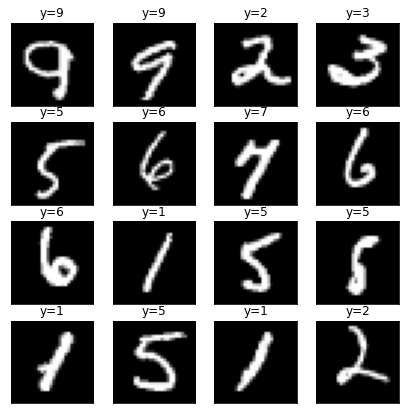

In [6]:
plt.figure(figsize=(7,7))
primero = 5000
for i in range(16):
    plt.subplot(4,4,i+1)
    # plt.imshow(X_train[primero+i].reshape(28, 28), cmap=plt.cm.gray)
    plt.imshow(X_train.iloc[primero+i].to_numpy().reshape(28, 28), cmap=plt.cm.gray)
    plt.title("y={}".format(y_train.iloc[primero+i]))
    plt.xticks([])
    plt.yticks([])

## 3.2. Construcción de la Red neuronal

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
# Rellena esta casilla con código para crear y entrenar
# un objeto de nombre MLP y clase MLPClassifier. Usa una capa oculta y 50 neuronas. 

MLP = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=10000, alpha=0.05)

MLP.fit(X_train, y_train)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(50,), max_iter=10000)

Calcula en la siguiente casilla los scores en training y test.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


predict_train = MLP.predict(X_train)
predict_test = MLP.predict(X_test)

print("Training:")
print("Accuracy: ", accuracy_score(y_train, predict_train))
print("Confusion matrix: ", confusion_matrix(y_train, predict_train))

print("\n\nTest:")
print("Accuracy: ", accuracy_score(y_test, predict_test))
print("Confusion matrix: ", confusion_matrix(y_test, predict_test))

Training:
Accuracy:  0.9971809523809524
Confusion matrix:  [[5172    0    3    0    0    2    1    0    0    3]
 [   0 5855    2    0    1    0    1    5    3    3]
 [   0    0 5184    1    3    0    0    1    2    0]
 [   0    0    2 5332    0    3    0    1   11    4]
 [   0    1    0    0 5121    0    1    1    0   10]
 [   3    0    1    1    0 4679    2    0    2    3]
 [   3    1    0    0    4    7 5189    0    3    0]
 [   1    9    9    1    3    0    0 5460    0   12]
 [   1    2    2    0    0    1    0    0 5109    2]
 [   1    0    0    1    2    4    0    0    2 5251]]


Test:
Accuracy:  0.9755428571428572
Confusion matrix:  [[1686    0    7    1    0    2   10    1   11    4]
 [   0 1984   11    4    1    0    0    5    0    2]
 [   4    4 1748   13    4    1    2    8   11    4]
 [   3    2   18 1709    1   22    1   11   11   10]
 [   1    4    1    0 1648    0    1    4    2   29]
 [   2    1    0   12    0 1580    8    1   10    8]
 [   3    0    4    0    1    7 164

## 3.3 Búsqueda en rejilla.

¿Opinas que otra configuración de los hiper-parámetros puede resolver el problema mas eficientemente? Es lo mas probable. Vamos ahora a cambiar el valor de los hiper-parámetros de la red neuronal y a devolver como red definitiva la que minimize la estimación del error de generalización. Para ello hay que hacer dos cosas. La primera, cambiar el modo en el que estimamos el error de generalización. Si basamos nuestro resultado en el error proporcionado por el test, haremos overfitting en el conjunto de test. Por ello debemos cambiar esta estimación. Estimaremos el error de generalización de cada red usando Nested Cross Validation. Por otro lado, haremos una búsqueda en rejilla de los hiper-parámetros óptimos. Devolveremos el valor de los hiper-parámetros que optimize esa estimación del error de la red. Adapta el código que encontrarás en https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html al problema MNIST y al espacio de hiper-parámetros de la red neuronal (cambiando el valor de la variable p_grid). Prueba a incluir en la rejilla el número de capas ocultas, el número de neuronas de las capas ocultas (haz que todas tengan el mismo número), la tasa de aprendizaje o la función de activación. Recuerda que en https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html tienes información sobre cada uno de los hiper-parámetros. Eres libre de elegir los valores y los hiper-parámetros que consideres. Antes de configurar la rejilla, lee un poco sobre cada uno de los hiper-parámetros para asegurarte de que tiene sentido tu búsqueda.

In [17]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
# Number of random trials

p_grid = {"activation": ["tanh", "relu"],
          "alpha": [0, 0.1],
          "learning_rate_init":[0.001, 0.01],
          "hidden_layer_sizes": [(50,50,50,50,50,), (50,10,50,)]}



# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.
# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
inner_cv = KFold(n_splits=4, shuffle=True, random_state=30)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=30)

# Non_nested parameter search and scoring
clf = GridSearchCV(estimator=MLP, param_grid=p_grid, cv=inner_cv, verbose=2)
clf.fit(X, y)
non_nested_scores = clf.best_score_
 


Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.001; total time= 2.4min
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.001; total time= 2.6min
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.001; total time= 2.0min
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.001; total time= 2.6min
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.01; total time= 1.1min
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.01; total time=  57.2s
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.01; total time= 1.0min
[CV] END activation=tanh, alpha=0, hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=

In [21]:
print(clf.cv_results_)
    

{'mean_fit_time': array([144.23682892,  62.7955327 , 123.82683438, 158.68563604,
       229.14554197, 156.50367701, 184.13029182,  72.60709578,
       138.69637865, 137.7632522 , 119.60314393, 130.75781864,
       214.76809436, 182.72860897, 152.44832772, 104.98237914]), 'std_fit_time': array([14.84837187,  4.24701634,  8.7787575 , 56.95537328, 53.68625802,
       30.22800512, 42.7235824 , 15.48828982, 26.34119846, 32.20676997,
       13.72916778, 12.75371175, 21.37137924, 20.24705396, 28.38352662,
       23.76093202]), 'mean_score_time': array([0.29944164, 0.24186093, 0.16865283, 0.15179163, 0.22936815,
       0.23712689, 0.14641541, 0.14191902, 0.17914569, 0.15640885,
       0.11743158, 0.11443371, 0.21287823, 0.20313305, 0.13567173,
       0.14941365]), 'std_score_time': array([0.02171219, 0.00353356, 0.01555354, 0.00246005, 0.01531047,
       0.01515587, 0.0054966 , 0.00099993, 0.02411497, 0.0021787 ,
       0.00402854, 0.00049943, 0.01946893, 0.02497935, 0.01378267,
       0.04248